<center><font size="6"> TP 3 : Applications de la décomposition en valeurs singulières </font> </center>

# Partie 1: recalage rigide de nuages de points 

Dans ce TP, nous allons étudier le problème du recalage orthogonal de deux ensembles de points dans l’espace Euclidien $\mathbb{R}^d$. Le but est de trouver une matrice orthogonale $R$ qui aligne un ensemble de points $A = x_1, \dots, x_N$ avec un autre ensemble de points $B = y_1, \dots, y_N$, de sorte que la distance entre les points correspondants soit minimisée.

## Contexte

On considère deux ensembles ordonnés de points $A = x_1, \dots, x_N$ et $B = y_1, \dots, y_N$ de l’espace Euclidien $\mathbb{R}^d$. Recaler $A$ sur $B$ revient à trouver la matrice orthogonale $R$ qui minimise la somme des distances entre les points de $A$ et $B$ après transformation par $R$. Ceci revient à résoudre le problème d'optimisation suivant :
\begin{equation}
\min_{R\in O(\mathbb{R}^d)}\sum_{i=1}^N \Vert Rx_i - y_i\Vert_2,  \qquad \qquad \qquad (1)
\end{equation}
où la solution est prise sur l’ensemble des matrices orthogonales de dimension $d$.

### Résolution du problème
Pour résoudre ce problème, nous utiliserons la décomposition en valeurs singulières.

Soit $X$ une matrice de taille $d \times N$ dont les colonnes sont les vecteurs $x_i$, et $Y$ une matrice de taille $d \times N$ dont les colonnes sont les vecteurs $y_i$. La résolution du problème (1) devient équivalente à la résolution du problème suivant :
\begin{equation}
\max_{R\in O(\mathbb{R}^d)}Tr(RXY^T), \qquad \qquad \qquad \quad (2)
\end{equation}
où $Tr$ est la trace de la matrice.

Nous utilisons la décomposition en valeurs singulières (SVD) de la matrice $B = XY^T$ pour obtenir une solution optimale. Si 
$B = U \Sigma V^T$. La solution optimale $R$ est donnée par :

\begin{equation}
R = V U^T \qquad \qquad \qquad \qquad \qquad \qquad (3)
\end{equation}

### Demonstration

On note $B = XY^T$ et on considère sa décomposition en valeurs singulières $B = U \Sigma V^T$. $R$ est solution de (2) si et seulement si la matrice orthogonale $M = V^TRU$ est solution de :
\begin{equation}
\max_{R\in O(\mathbb{R}^d)}Tr(M\Sigma), \qquad \qquad \qquad \qquad (4)
\end{equation}
En utilisant l’orthogonalité de $M$, on montre que $M$ maximise (4) si et seulement si $m_{ii} = 1$ pour tout $i \in \{1, \dots, d\}$ et $m_{ij} = 0$ pour $i\neq j$, c'est-à-dire si et seulement si $M = I_d$.
En conclusion, on a $R = V U^T$ est la solution unique du problème (1).

## Application numérique


### 1. Génération de deux matrices $X$ et $Y$

**Etape 1: génération de la matrice $X$** 

- Créez une matrice $X$ de dimension $3 \times N$ contenant des valeurs aléatoires entre -0.5 et 0.5.

In [25]:
import numpy as np
from numpy import linalg as la

In [26]:
# Paramètres: N nb de points
N = 1000

# Nous utilisons un seed fixe pour la reproductibilité
np.random.seed(11)  

# Génération des points du nuage X
X = np.random.rand(3, N)-0.5

# Afficher les coordonnées de quelques points de X
print(X.T[0:5])

[[-0.31973031 -0.36527433  0.29399978]
 [-0.48052476 -0.30922154 -0.35720305]
 [-0.03678147 -0.09827254  0.03882476]
 [ 0.22493393 -0.09867971  0.13714007]
 [-0.0797964  -0.45115535 -0.32273421]]




**Etape 2: création d'une matrice orthogonale aléatoire $P$**

- Créez une matrice de rotation orthogonale aléatoire $P$ de dimension $3 \times 3$ en utilisant la décomposition SVD. Notez que la décomposition vous fournira trois matrices : $U$, $\Sigma$ et $V^T$. Les matrices $U$ et $V$ issues de la SVD sont orthogonales, ce qui signifie que vous pouvez utiliser l'une d'elles comme votre matrice $P$

In [27]:
# Générer une matrice aléatoire M de taille 3 x 3
M = np.random.rand(3, 3)

# Decomposition SVD de M
U, S, Vt = la.svd(M)

# Définir la matrice de rotation P qui sera utilisée
P = U

In [28]:
print(P, np.linalg.det(P))

[[-0.56922355  0.81578309 -0.10238408]
 [-0.50431013 -0.44478247 -0.74016204]
 [-0.64935032 -0.36968433  0.66458834]] 1.0000000000000002


**Etape 3: création d'un nuage $Y$**

- Appliquez la rotation $P$ aux points $X$ pour obtenir un nouvel ensemble de points $Y$. Puis ajoutez une petite perturbation aléatoire: <tt>0.01 * np.random.rand(3, N)</tt> à $Y$.

In [29]:
# Création de Y par rotation P de X
Y = P @ X + np.random.rand(3, N)*0.01

print(Y.T[0:5])

[[-0.14287959  0.11431318  0.54659763]
 [ 0.06652569  0.64455651  0.1951215 ]
 [-0.05465967  0.03992262  0.0920562 ]
 [-0.21558408 -0.16692377 -0.01194006]
 [-0.28295925  0.48734436  0.00471813]]


### 2. Calcul du recalage orthogonal

- Ecrivez une fonction <tt>recalage_orthogonal</tt> qui prend en entrée deux ensembles de points $X$ et $Y$ et renvoie la matrice de recalage $R$, solution du problème (1). Puis, utilisez votre fonction <tt>recalage_orthogonal</tt> pour calculer le recalage
orthogonal R entre X et Y.

In [30]:
def recalage_ortho(X, Y):
    """
    Recalage orthogonal de Y sur X
    """
    
    # Calcul de la matrice de covariance
    B = X @ Y.T
    
    # Calcul de la SVD de C
    U, S, Vt = la.svd(B)
    
    # Calcul de la matrice de rotation
    # R = V*U.T = R_.T
    R_ = U @ Vt    

    return R_.T

- Comparez ensuite $R$ avec la matrice de rotation $P$ utilisée pour générer $Y$. Pour cela, vous pouvez calculer la norme de la différence entre $R$ et $P$.

In [31]:
print(recalage_ortho(X, Y), "\n\n", P, "\n\n",  np.linalg.norm(recalage_ortho(X, Y)-P))

[[-0.56915399  0.81585804 -0.10217337]
 [-0.50434901 -0.44454883 -0.74027591]
 [-0.6493811  -0.36979994  0.66449393]] 

 [[-0.56922355  0.81578309 -0.10238408]
 [-0.50431013 -0.44478247 -0.74016204]
 [-0.64935032 -0.36968433  0.66458834]] 

 0.0003836003163621138


- Essayez également de recalculer $R$ sans la petite perturbation ajoutée à $Y$, puis affichez la différence entre $R$ et $P$.

In [32]:
Y_no_noise = P @ X
print(recalage_ortho(X, Y_no_noise), "\n\n", P, "\n\n",  np.linalg.norm(recalage_ortho(X, Y_no_noise)-P))

[[-0.56922355  0.81578309 -0.10238408]
 [-0.50431013 -0.44478247 -0.74016204]
 [-0.64935032 -0.36968433  0.66458834]] 

 [[-0.56922355  0.81578309 -0.10238408]
 [-0.50431013 -0.44478247 -0.74016204]
 [-0.64935032 -0.36968433  0.66458834]] 

 7.044942488541625e-16


### 3. Visualisation des points en dimension 3

Pour mieux observer les effets des rotations et des perturbations, nous allons utiliser un ensemble plus réduit de points N=5. Le code ci-dessous permet de créer et de représenter un nuage de points initial, ainsi que le nuage de points obtenu après l'application de la rotation. 

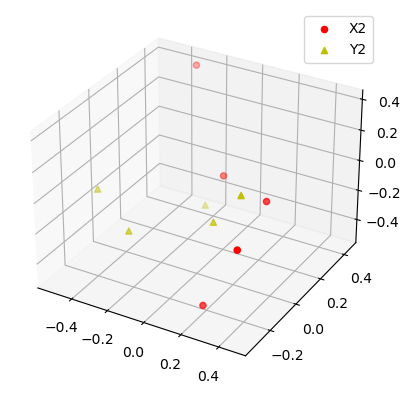

In [49]:
import matplotlib.pyplot as plt

# Génération de N points en 3D: ax=plt.axes et méthode ax.scatter3D
N2 = 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Création d’une matrice orthogonale aléatoire P2
U2, S2, Vt2 = la.svd(np.random.rand(3, 3))
P2 = U2

# Création de Y2 par rotation aléatoire de X2
X2 = np.random.rand(3, N2)-0.5
Y2 = P2 @ X2 + np.random.rand(3, N2)*0.01



ax.scatter3D(X2[0], X2[1], X2[2], c='r', marker='o')
ax.scatter3D(Y2[0], Y2[1], Y2[2], c='y', marker='^')
ax.legend(["X2", "Y2"])
plt.show()


- Affichez en plus le nuage de points obtenus en appliquant à X2 le recalage entre X2 et Y2, et vérifiez visuellement que ces points sont proches de ceux de Y2.

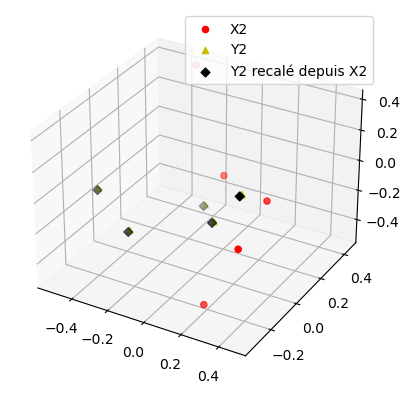

In [51]:
# Recalage de Y2 sur X2
P2_ = recalage_ortho(X2, Y2)

# Affichage des points recalés
Y2_ = P2_ @ X2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X2[0], X2[1], X2[2], c='r', marker='o')
ax.scatter3D(Y2[0], Y2[1], Y2[2], c='y', marker='^')
ax.scatter3D(Y2_[0], Y2_[1], Y2_[2], c='k', marker='D')
ax.legend(["X2", "Y2", "Y2 recalé depuis X2"])
plt.show()

# Partie 2: Compression d'images par décomposition en valeurs singulières

Une image peut être représentée par une matrice $A$ de taille $m\times n$, où chaque élément de la matrice représente un niveau de luminosité d'un pixel. En utilisant la décomposition en valeurs singulières (SVD), nous pouvons exprimer cette matrice $A$ sous la forme $A = U \Sigma V^T$ où $\Sigma$ est une matrice diagonale dont le nombre des éléments diagonaux non-nuls est égal au rang de $A$. 

Le principe fondamental de la compression d'images à l'aide de la décomposition SVD consiste à utiliser une matrice de rang réduit pour approximer la matrice $A$. Cette approche est appelée **SVD tronquée**.

Nous allons utiliser la SVD tronquée pour le traitement d'images, en utilisant une image classique de Lenna (téléchargeable sur https://en.wikipedia.org/wiki/Lenna).

### Chargement de l'image
- Téléchargez l'image depuis le lien fourni. Vous pouvez enregistrer l'image dans le même répertoire que votre notebook Jupyter sous le nom *Lenna.png*
- Ensuite, chargez l'image et affichez-la dans le notebook. Puis afficher la taille de la matrice associée à cette image.

In [55]:
import matplotlib.pyplot as pyp
import matplotlib.image as img

# chargement de l'image dans A à l'aide de img.imread()
A = img.imread('./Lenna.png')

#pyp.imshow(A)

# Afficher la taille de l'image
print(A.shape)


(512, 512, 3)


### Manipulation de l'image en niveaux de gris
- Utilisez le code suivant pour convertir l'image en noir sur blanc, puis affichez la taille de la matrice

(512, 512)


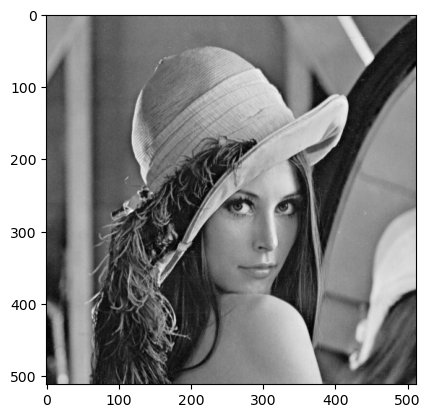

In [56]:
rgb_weights = [0.2989, 0.5870, 0.1140]
Ag = np.dot(A[...,:3], rgb_weights)

# afficher à l'aide de plt.imshow() et cmap=pyp.get_cmap("gray")
pyp.imshow(Ag, cmap=pyp.get_cmap("gray"))

# Afficher la taille de l'image
print(Ag.shape)


- Écrivez une fonction **<tt>svd_tronquee</tt>** qui prend en entrée une matrice (image en noir sur blanc) $Ag$ et un entier $k$, inférieur au rang de $A$, et qui renvoie une matrice $B$ de rang $k$, constituant une approximation de $Ag$ d'ordre $k$. Pour cela, il faudra sélectionner les parties appropriées des matrices $U$, $\Sigma$ et $V$, issues de la décomposition SVD, afin de reconstruire la matrice $B$. Testez votre fonction pour $ k = 100$.


**Note:** $B$ est calculé ici uniquement pour des raisons de visualisation, le résultat est en général conservé sous forme de 3 matrices : $U_k$, $\Sigma_k$ et $V_k^T$ qui sont des versions tronquées de $U$, $\Sigma$ et $V^T$.

Rang A :  507
Rang B :  100


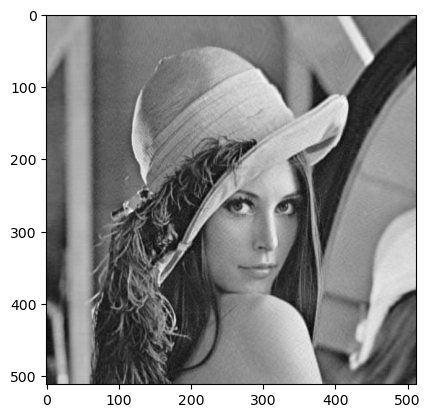

In [57]:
def svd_tronquee(A, k):
    """
    Retourne la SVD tronquée de A à l'ordre k
    """
    print("Rang A : ", np.linalg.matrix_rank(A))
    U, S, Vt = la.svd(A)
    B = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    print("Rang B : ", np.linalg.matrix_rank(B))
    return B

pyp.imshow(svd_tronquee(Ag, 100), cmap=pyp.get_cmap("gray"))

La décomposition SVD nous permet de représenter la matrice $A$ sous forme de 3 matrices tronquées: $U_k$, $\Sigma_k$ et $V_k^T$ qui sont des versions tronquées de $U$, $\Sigma$ et $V^T$. 

- Sachant que le nombre d'éléments de la matrice $A$ est $m*n$, calculez le nombre total d'éléments nécessaires pour stocker les matrices tronquées $U_k$, $\Sigma_k$ et $V_k^T$.
- Ensuite, affichez le pourcentage de compression obtenu par rapport à l'image originale en noir sur blanc.

Pour une matrice d'entrée $ m \times n $, on obtient par la decomposition SVD où U est de dimension $ m \times m $, $\Sigma$ est de dimension $ m \times n $ et $V^T$ est de dimension $ n \times n $.

Dans notre cas, on passe d'un stockage de $ m \times n $ éléments à un stockage de $ m \times k + k + k \times n $ éléments, où $k$ est le rang de la matrice tronquée.

In [82]:
# En pratique pour Lenna avec k = 100

k = 100
U, S, Vt = la.svd(A)
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vtk = Vt[:k, :]
nbElem = k*(Uk.shape[1] + 1 + Vtk.shape[0])
print("Nombre d'éléments pour la SVD tronquée : ", nbElem)
print("Nombre d'éléments pour l'image originale : ", A.shape[0]*A.shape[1])

print("L'image compressée est ", (A.shape[0]*A.shape[1])/nbElem, " fois plus petite que l'image originale (", (nbElem/(A.shape[0]*A.shape[1]))*100, "% de la taille de l'image originale)" ) 


Nombre d'éléments pour la SVD tronquée :  20100
Nombre d'éléments pour l'image originale :  262144
L'image compressée est  13.041990049751243  fois plus petite que l'image originale ( 7.66754150390625 % de la taille de l'image originale)


- Visualisez les images approximées pour les valeurs de k: 5, 20, 50, 100, 200. Pour chaque valeur de $k$, affichez le pourcentage de compression, ainsi que l'erreur relative
$$ err = \frac{\Vert Ag - C_k\Vert_2}{\Vert Ag\Vert_2},$$

où $C_k$ est la SVD tronquée de $Ag$ pour la valeur $k$. 
- Que pensez vous du résultat?

Rang A :  507
Rang B :  5
Rang A :  507
Rang B :  20
Rang A :  507
Rang B :  50
Rang A :  507
Rang B :  100
Rang A :  507
Rang B :  200


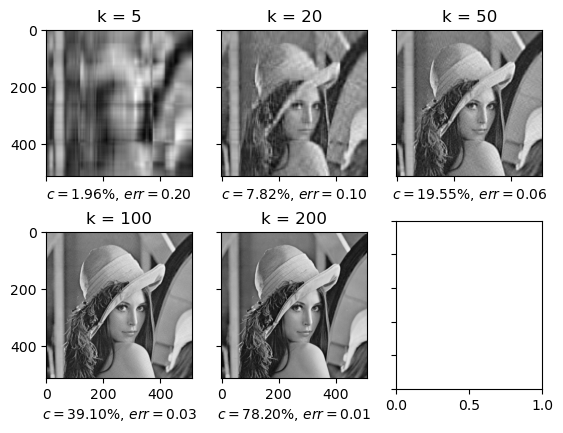

In [89]:
# Visualisation des images approximées avec différentes valeurs de k
fig, axs = pyp.subplots(2, 3)
for ax in axs.flat:
    ax.label_outer()

for i, k in enumerate([5, 20, 50, 100, 200]):
    svdt = svd_tronquee(Ag, k)
    axs[i//3, i%3].imshow(svdt, cmap=pyp.get_cmap("gray"))
    nbElem = k*(A.shape[0] + 1 + A.shape[1])
    pourcCompress = nbElem/(A.shape[0]*A.shape[1])

    err = np.linalg.norm(svdt-Ag)/np.linalg.norm(Ag)

    axs[i//3, i%3].set_xlabel("$c =  {a:.2f}$%, $ err = {e:.2f} $".format(a = pourcCompress*100, e = err))
    axs[i//3, i%3].set_title("k = " + str(k))
pyp.show()

### Manipulation de l'image en couleurs

Dans cette section, nous allons appliquer les mêmes méthodes d'approximation, mais cette fois-ci sur une image en couleurs. Une image en couleurs est représentée par trois canaux : Rouge (R), Vert (G) et Bleu (B), qui correspondent à la troisième dimension de la matrice 

$A$. Pour compresser cette image à l'aide de la SVD tronquée, il est nécessaire d'appliquer la SVD séparément sur chacun des canaux $R$, 
$G$, et $B$, puis de les recombiner pour reconstruire l'image compressée.

- Écrivez une fonction <tt>svd_tronquee_couleur</tt> qui prend en entrée une matrice $A$ (image en couleurs) et un entier $k$, inférieur au rang de $A$, et qui renvoie une matrice $B$ de rang $k$, constituant une approximation de $A$ d'ordre $k$. Testez votre fonction pour $ k = 100$.

- Visualisez les images approximées pour les valeurs de k: 5, 20, 50, 100, 200. Pour chaque valeur de k , calculez l'erreur relative ainsi que le pourcentage de compression.

In [92]:
def svd_tronquee_couleur(A, k):
    """
    Retourne la SVD tronquée de A à l'ordre k
    """
    C = np.zeros((A.shape[0], A.shape[1], 3))
    for cannal in range(3):
        U, S, Vt = la.svd(A[:, :, cannal])
        B = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
        B = np.clip(B, 0, 1) # si on a du RGB on doit clipper les valeurs entre 0 et 1
        C[:, :, cannal] = B
    return C

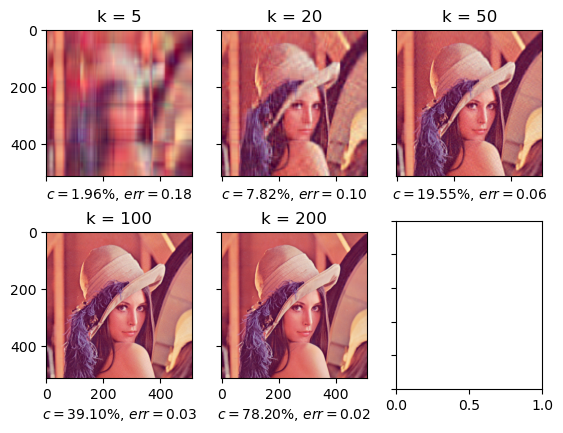

In [93]:
# Visualisation des images approximées avec différentes valeurs de k
fig, axs = pyp.subplots(2, 3)
for ax in axs.flat:
    ax.label_outer()

for i, k in enumerate([5, 20, 50, 100, 200]):
    svdt = svd_tronquee_couleur(A, k)
    axs[i//3, i%3].imshow(svdt)
    nbElem = k*(A.shape[0] + 1 + A.shape[1])
    pourcCompress = nbElem/(A.shape[0]*A.shape[1])

    err = np.linalg.norm(svdt-A)/np.linalg.norm(A)

    axs[i//3, i%3].set_xlabel("$c =  {a:.2f}$%, $ err = {e:.2f} $".format(a = pourcCompress*100, e = err))
    axs[i//3, i%3].set_title("k = " + str(k))